
# Simple Linear Regression with Gradient Descent and Scikit-Learn


The purpose of this notebook is to explain the implementation of a simple linear regression model with two different approaches. The first is with the gradient descent algorithm. Second is using linear regression model from the Scikit-Learn module from Python library.
This notebook is also the continuation of our previous lab activity of implementing simple linear regression using ordinary least square method.
I have explained the general intuition and mathematical theory behind the gradient descent algorithm.

In the initialization phase, all the required Python libraries are imported, and the data set has been loaded as the data frame in the memory for further processing. 

Also, the data format is analyzed, and the relationship between the dependent and independent variable is visualized to develop an initial understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('AttendanceMarksSA.csv')
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


<Axes: xlabel='MSE', ylabel='ESE'>

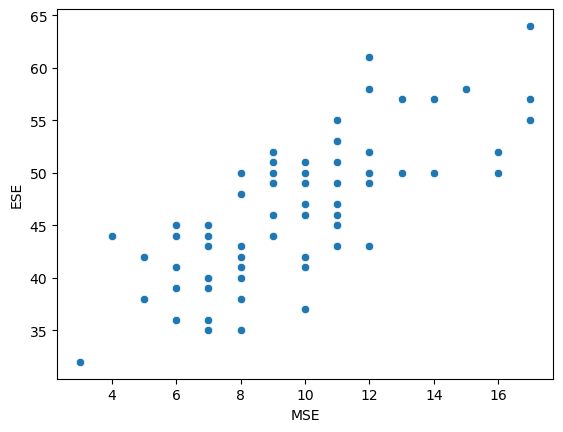

In [4]:
X= df['MSE']
Y=df['ESE']
sns.scatterplot(x=X, y=Y)

The parameters (i.e., beta0,beta1) and hyper-parameters (e.g., alpha, count) are initialised to zero to initiate the implementation of the gradient descent algorithm.

In [5]:
beta0=0
beta1=0
alpha=0.01
count =10000
n=float(len(X))

In [9]:
alpha

0.01

The code segment implements the iterative process of gradient descent algorithm. This code segment calculates the partial derivative of the error function. It minimizes the error function to calculate the values of beta0 and beta1.

In [10]:
for i in range(count): 
    Ybar = beta1*X + beta0    
    beta1 = beta1 - (alpha/n)*sum(X*(Ybar-Y))
    beta0 = beta0 - (alpha/n)*sum(Ybar-Y)
    
print(beta0,beta1)

30.66635155773406 1.6321517235115022


The following code segment plots the identified best fit line or regression line visually.

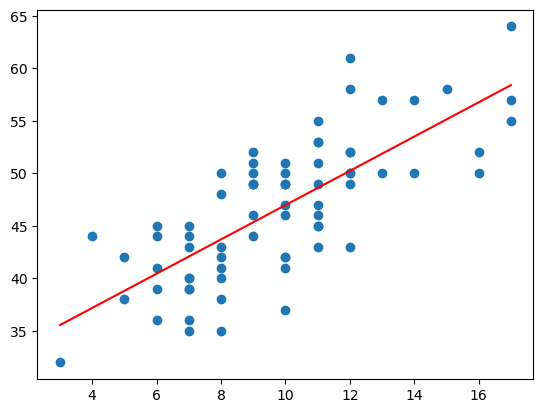

In [11]:
Ybar = beta1*X + beta0

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Ybar), max(Ybar)], color='red')  # regression line
plt.show()

In [12]:
import math
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse


rse= RSE(df['ESE'],Ybar)
print(rse)

4.396224549647795


The second way to indirectly implement the gradient descent algorithm is to use the LinearRegression module form Scikit-Learn. The SciKit-Learn use Object-Oriented approach to implementing various machine learning algorithms. 

Here, I am using LinearRegression() class and the fit() method from the LinearRegression() class assuming it implements the gradient descent algorithm.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

The following code segments first extract input and output feature vector from the data frame and convert them into the array representation.

In [14]:
x = np.array(df['MSE']).reshape(-1,1)
y = np.array(df['ESE']).reshape(-1,1)
 

lr = LinearRegression()
lr.fit(x,y)


print(lr.coef_)
print(lr.intercept_)

yp = lr.predict(x)
rse = RSE(y,yp)

print(rse)

 


[[1.63215164]]
[30.66635246]
4.396224549647787


**Interpretation of the Result:**

The Linear Regression model implementd through the gradient descent algorithm  and from the LinearRegression() class from the Scikit-Learn module approximately claculates the same values for slope (beta1) and y-intercept(beta0) and also with the acceptable level of RSE i.e. **4.39.** i.e. the model predicts  end sem exam marks with +/- 4 error from mid-sem exam.